In [195]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
from patsy import dmatrices
from openpyxl import load_workbook

from library import regulations
from library import characteristics
from library import analysis
from library import tables

In [127]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data.head()

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,416) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,district,distname,year,cntyname,distischarter,rating_academic,rating_financial,eligible,type,...,type_urban,type_suburban,type_town,type_rural,index,always_eligible,teachers_nodegree,teachers_badegree,teachers_msdegree,teachers_phddegree
0,0,1902,CAYUGA ISD,yr1112,ANDERSON,N,NaN,NaN,NaN,H,...,0,0,0,1,180.0,True,0.000000,0.457439,0.062117,0.000000
1,1,1903,ELKHART ISD,yr1112,ANDERSON,N,NaN,NaN,NaN,G,...,0,0,1,0,344.0,True,0.000000,0.523077,0.108609,0.000000
2,2,1904,FRANKSTON ISD,yr1112,ANDERSON,N,NaN,NaN,NaN,H,...,0,0,0,1,388.0,True,0.000000,0.452648,0.095202,0.000000
3,3,1906,NECHES ISD,yr1112,ANDERSON,N,NaN,NaN,NaN,H,...,0,0,0,1,773.0,True,0.000000,0.553633,0.017301,0.000000
4,4,1907,PALESTINE ISD,yr1112,ANDERSON,N,NaN,NaN,NaN,E,...,0,0,1,0,824.0,True,0.002184,0.439686,0.099342,0.002316


#### Clean data to eligible districts and one pre-treatment year (2014-15) 

In [128]:
data = data[(data.eligible == 1) & (data.year == 'yr1415')]

In [129]:
data.loc[data.date_year == -999, ['date_year']] = None
data.loc[data.date_year > 2019, ['date_year']] = None

data['doi_year'] = None
data.loc[data.doi == True, ['doi_year']] = data.date_year - 2014
data.loc[data.doi == False, ['doi_year']] = 0
data['doi_year'] = pd.to_numeric(data.doi_year)
data[['date_year', 'doi_year', 'doi']].head(10)

,date_year,doi_year,doi
3682,2017.0,3.0,True
3683,2018.0,4.0,True
3684,2017.0,3.0,True
3685,2017.0,3.0,True
3686,2016.0,2.0,True
3687,2017.0,3.0,True
3688,NaN,NaN,True
3689,NaN,0.0,False
3691,2017.0,3.0,True
3692,2015.0,1.0,True


In [130]:
post_years = [2014, 2015, 2016, 2017, 2018]
for yr in post_years:
    num_dois = len(data[(data.doi == True) & (data.date_year == yr)])
    print('In ' + str(yr) + ', '  + str(num_dois), 'are new DOIs')

In 2014, 0 are new DOIs
In 2015, 14 are new DOIs
In 2016, 118 are new DOIs
In 2017, 399 are new DOIs
In 2018, 95 are new DOIs


# Characteristics by Adoption Year

(array([221.,   0.,  14.,   0., 118.,   0., 399.,   0.,  95.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

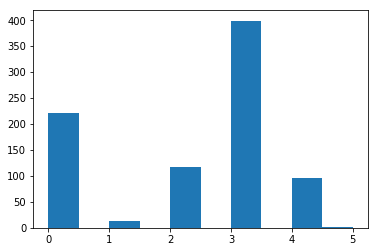

In [131]:
notmissing = data[pd.notnull(data.doi_year)].doi_year
plt.hist(notmissing)

In [138]:
y, X = dmatrices('students_num ~ doi + doi_year', data=data, return_type='dataframe', NA_action = "drop")
X.head()

,Intercept,doi[T.True],doi_year
3682,1.0,1.0,3.0
3683,1.0,1.0,4.0
3684,1.0,1.0,3.0
3685,1.0,1.0,3.0
3686,1.0,1.0,2.0


In [141]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:           students_num   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.342
Date:                Sat, 09 Mar 2019   Prob (F-statistic):              0.262
Time:                        12:26:50   Log-Likelihood:                -9346.7
No. Observations:                 848   AIC:                         1.870e+04
Df Residuals:                     845   BIC:                         1.871e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5649.3484    998.064      5.660      

5649.35

# Make mini table

In [153]:
def coef_with_stars(coef, pvalue):
    if pvalue >.05:
        coef = str(coef)
    if pvalue <= .05:
        coef = str(coef) + '*'
    if pvalue <= .01:
        coef = coef + '*'
    if pvalue <= .001:
        coef = coef + '*'
    return(coef)
test = coef_with_stars(.1, .05)
test

'0.1*'

In [156]:
test = ['1', '2']

In [186]:
coef_1 = []
formula = 'math' + ' ~ ' + 'doi + doi_year'
y, X = dmatrices('students_num ~ doi + doi_year', data=data, return_type='dataframe', NA_action = "drop") 
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model
result = res.summary()
res.params['doi[T.True]']
res.bse['doi_year']
#coef_1.append(coef_with_stars(res.params['doi']))

                            OLS Regression Results                            
Dep. Variable:           students_num   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.342
Date:                Sat, 09 Mar 2019   Prob (F-statistic):              0.262
Time:                        13:11:37   Log-Likelihood:                -9346.7
No. Observations:                 848   AIC:                         1.870e+04
Df Residuals:                     845   BIC:                         1.871e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5649.3484    998.064      5.660      

904.3584687994638

In [191]:
def make_coef_df(data, y_list, y_labels):
    regs = []
    cons = []
    coef_1 = []
    coef_2 = []
    se_1 = []
    se_2 = []
    pvalue_1 = []

    for var in y_list:
        formula = var + ' ~ ' + 'doi + doi_year'
        y, X = dmatrices(formula, data=data, return_type='dataframe', NA_action = "drop") 
        mod = sm.OLS(y, X)    # Describe model
        res = mod.fit()       # Fit model
        print(y_labels[var])
        print(res.summary())   # Summarize model
        cons.append(str(res.params["Intercept"].round(2)))
        cons.append('')
        coef_1.append(coef_with_stars(res.params['doi[T.True]'].round(2), res.pvalues['doi[T.True]']))
        coef_1.append('(' + str(res.bse['doi[T.True]'].round(2)) + ')')
        coef_2.append(coef_with_stars(res.params['doi_year'].round(2), res.pvalues['doi_year']))
        coef_2.append('(' + str(res.bse['doi_year'].round(2)) + ')')
        regs.append(y_labels[var])
        regs.append('')


    df = pd.DataFrame(
        {'Characteristic': regs,
         'Control': cons,
         'DOI Difference': coef_1,
         'DOI Year': coef_2,
         })
    return df
geo = make_coef_df(data = data, 
                                 y_list = characteristics.geography,
                                 y_labels = characteristics.labels)
geo

Urban
                            OLS Regression Results                            
Dep. Variable:             type_urban   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5500
Date:                Sat, 09 Mar 2019   Prob (F-statistic):              0.577
Time:                        13:22:51   Log-Likelihood:                 65.367
No. Observations:                 848   AIC:                            -124.7
Df Residuals:                     845   BIC:                            -110.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0588      0.015      3.897

,Characteristic,Control,DOI Difference,DOI Year
0,Urban,0.06,0.03,-0.01
1,,,(0.04),(0.01)
2,Suburban,0.25,0.03,-0.01
3,,,(0.09),(0.03)
4,Town,0.23,0.11,-0.01
5,,,(0.09),(0.03)
6,Rural,0.46,-0.17,0.04
7,,,(0.1),(0.03)


In [192]:
teacher = make_coef_df(data = data, 
                                 y_list = characteristics.teacher,
                                 y_labels = characteristics.labels)
teacher

Ave. Experience Teaching
                             OLS Regression Results                            
Dep. Variable:     teachers_tenure_ave   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.1292
Date:                 Sat, 09 Mar 2019   Prob (F-statistic):              0.879
Time:                         13:25:25   Log-Likelihood:                -1766.5
No. Observations:                  848   AIC:                             3539.
Df Residuals:                      845   BIC:                             3553.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      

,Characteristic,Control,DOI Difference,DOI Year
0,Ave. Experience Teaching,7.32,-0.13,0.05
1,,,(0.38),(0.12)
2,Teacher Turnover Ratio,0.2,-0.03,0.01
3,,,(0.02),(0.01)
4,Student-Teacher Ratio,6.42,0.47*,-0.05
5,,,(0.24),(0.07)


In [193]:
student = make_coef_df(data = data, 
                                 y_list = characteristics.student,
                                 y_labels = characteristics.labels)
student

Percent Hispanic
                            OLS Regression Results                            
Dep. Variable:          students_hisp   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     25.67
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.51e-11
Time:                        13:26:03   Log-Likelihood:                -74.135
No. Observations:                 848   AIC:                             154.3
Df Residuals:                     845   BIC:                             168.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5023      0.018

,Characteristic,Control,DOI Difference,DOI Year
0,Percent Hispanic,0.5,-0.12*,-0.01
1,,,(0.05),(0.02)
2,Percent White,0.42,0.06,0.02
3,,,(0.05),(0.02)
4,Percent Black,0.05,0.03,-0.0
5,,,(0.02),(0.01)
6,Percent Econ. Disadvantaged,0.62,-0.09**,0.01
7,,,(0.04),(0.01)
8,Average STAAR Performance (Std.),-0.11,0.44***,-0.06
9,,,(0.13),(0.04)


# To Table

In [196]:
rows = [6, 15, 22]

In [206]:
dfs = [geo, teacher, student]
file = table_path + 'regression_doi_year.xlsx'
wb = load_workbook(file)
ws = wb.active
str_n = 'N = ' + str(len(data[data.doi == False]))
ws.cell(row=4, column=2).value = str_n
str_n = 'N = ' + str(len(data[data.doi == True]))

for df, row in zip(dfs, rows):
    ws.cell(row=4, column=3).value = str_n
    row_n = row
    for ob in df.Control:
        ws.cell(row=row_n, column=2).value = ob
        row_n = row_n + 1
    row_n = row
    for ob in df['DOI Difference']:
        ws.cell(row=row_n, column=3).value = ob
        row_n = row_n + 1   
    row_n = row
    for ob in df['DOI Year']:
        ws.cell(row=row_n, column=4).value = ob
        row_n = row_n + 1 
wb.save(file)